<a href="https://colab.research.google.com/github/tanjummotin/Preprocessing-and-visualization-Task/blob/main/Markopolo_ai_assessment_winequality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To run this file, at first the winequality-red.csv file need to be uploaded.

In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

import seaborn as sns
from time import time

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-red.csv", sep=';')

# Display first few records
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.shape


(1599, 12)

##Remove duplicate entries from the dataset using Python

In [7]:
# Drop duplicate rows from the DataFrame
data = data.drop_duplicates()

In [8]:
data.shape

(1359, 12)

In [9]:
# Find the number of duplicate entries
duplicate_count = data.duplicated().sum()

# Print the result
print("Number of duplicate entries:", duplicate_count)

Number of duplicate entries: 0


##Handle missing values appropriately (e.g., impute, drop, or interpolate) using Python

In [10]:
data.tail(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1566,6.7,0.160,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,6
1568,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.2,5
1569,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
1572,7.3,0.690,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6
1576,8.0,0.300,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6


In [11]:
rows_with_missing_values = data.isnull().sum(axis=1).astype(bool).sum()

# Print the result
print("Number of rows with missing values:", rows_with_missing_values)

Number of rows with missing values: 0


###There is no missing values. That's why i didn't use any techniques.

###Remove outliers or noisy data points that may impact the analysis using Python.

In [12]:
data['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [13]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "quality"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75)

print(Q1,Q3)

# Select and Calculate outlier range using interquartile range
outlier_range = 1.5 * (Q3 - Q1)

# Outliers in data
num_data = data[((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

5.0 6.0
Number of outliers removed:  27


In [14]:
data.shape

(1332, 12)

In [15]:
data['quality'].value_counts()



5    577
6    535
7    167
4     53
Name: quality, dtype: int64

#Data Visualization

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1332 non-null   float64
 1   volatile acidity      1332 non-null   float64
 2   citric acid           1332 non-null   float64
 3   residual sugar        1332 non-null   float64
 4   chlorides             1332 non-null   float64
 5   free sulfur dioxide   1332 non-null   float64
 6   total sulfur dioxide  1332 non-null   float64
 7   density               1332 non-null   float64
 8   pH                    1332 non-null   float64
 9   sulphates             1332 non-null   float64
 10  alcohol               1332 non-null   float64
 11  quality               1332 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 125.0 KB


In [17]:
#Count the number of unique values
print(data["quality"].unique())
print(type(data["quality"].unique()))
print(len(data["quality"].unique()))

print(data["quality"].value_counts())

[5 6 7 4]
<class 'numpy.ndarray'>
4
5    577
6    535
7    167
4     53
Name: quality, dtype: int64


##Bar Plot

In [18]:
print(data["quality"].value_counts())

print(type(data["quality"].value_counts()))

df_qualityType = pd.DataFrame(data["quality"].value_counts())

display(df_qualityType.head())
print(df_qualityType.index)
print(df_qualityType.columns)

5    577
6    535
7    167
4     53
Name: quality, dtype: int64
<class 'pandas.core.series.Series'>


,quality
5,577
6,535
7,167
4,53


Int64Index([5, 6, 7, 4], dtype='int64')
Index(['quality'], dtype='object')


In [19]:
df_qualityType = pd.DataFrame(data["quality"].value_counts())
df_qualityType = df_qualityType.reset_index()
df_qualityType = df_qualityType.rename(columns={"index":"quality",
                                          "quality":"no_of_samples"})
df_qualityType["% of samples"] = (df_qualityType["no_of_samples"]/data.shape[0])*100

df_qualityType = df_qualityType.round(2)


display(df_qualityType)

,quality,no_of_samples,% of samples
0,5,577,43.32
1,6,535,40.17
2,7,167,12.54
3,4,53,3.98


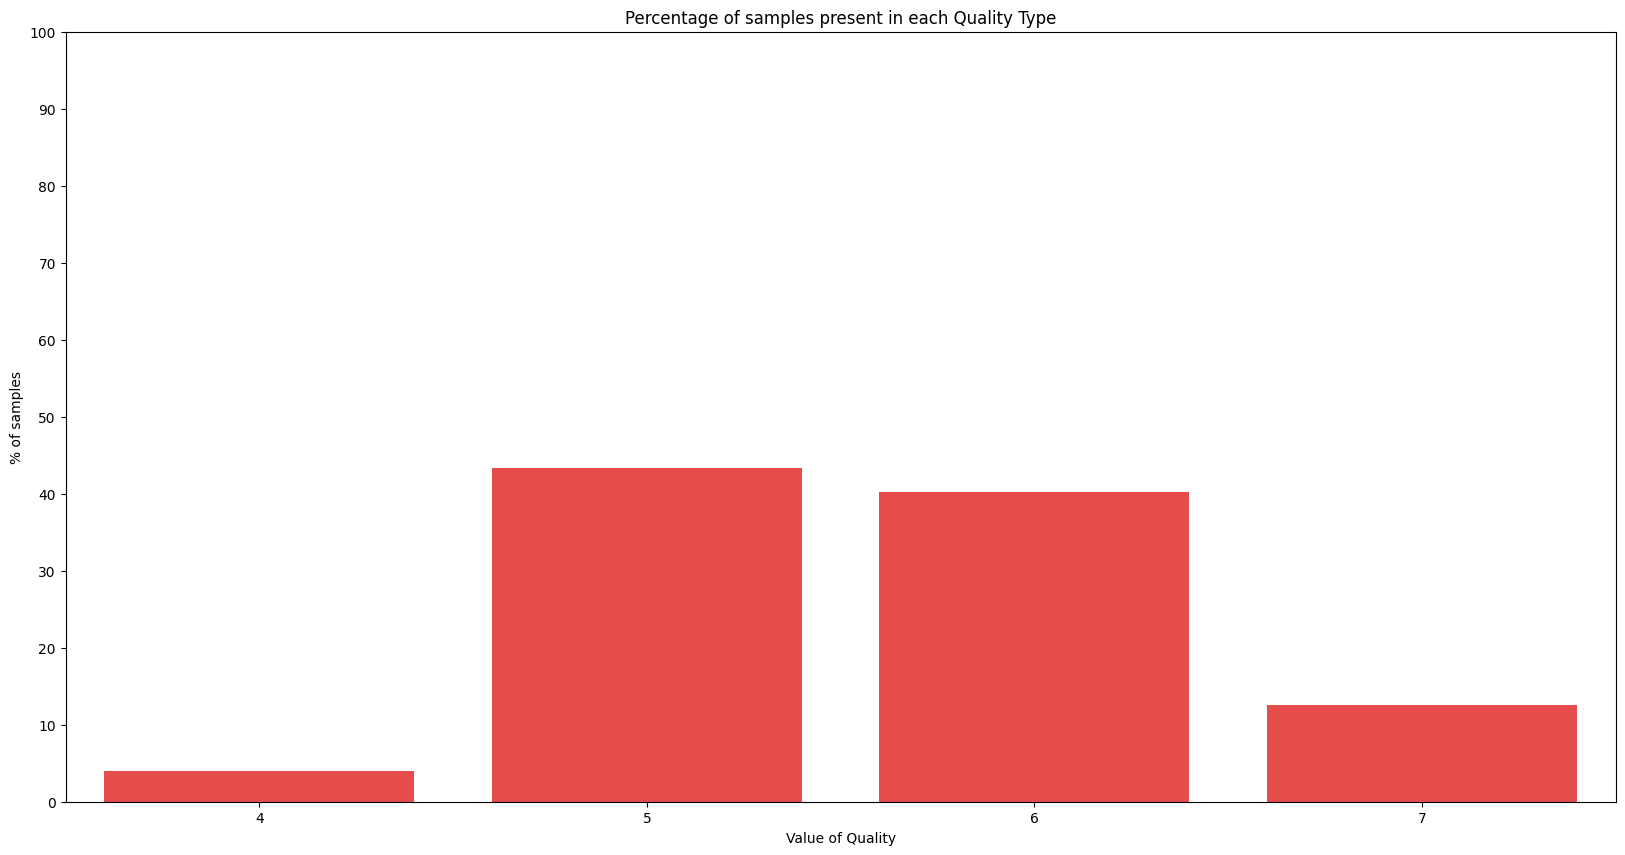

In [20]:
sns.barplot(x="quality",
            y="% of samples",
            data=df_qualityType,
            color="red",
            alpha=0.8)

plt.xlabel("Value of Quality")
plt.ylabel("% of samples")
plt.title("Percentage of samples present in each Quality Type")

plt.yticks(np.arange(0,101,10))

plt.show()

##Scatter plot

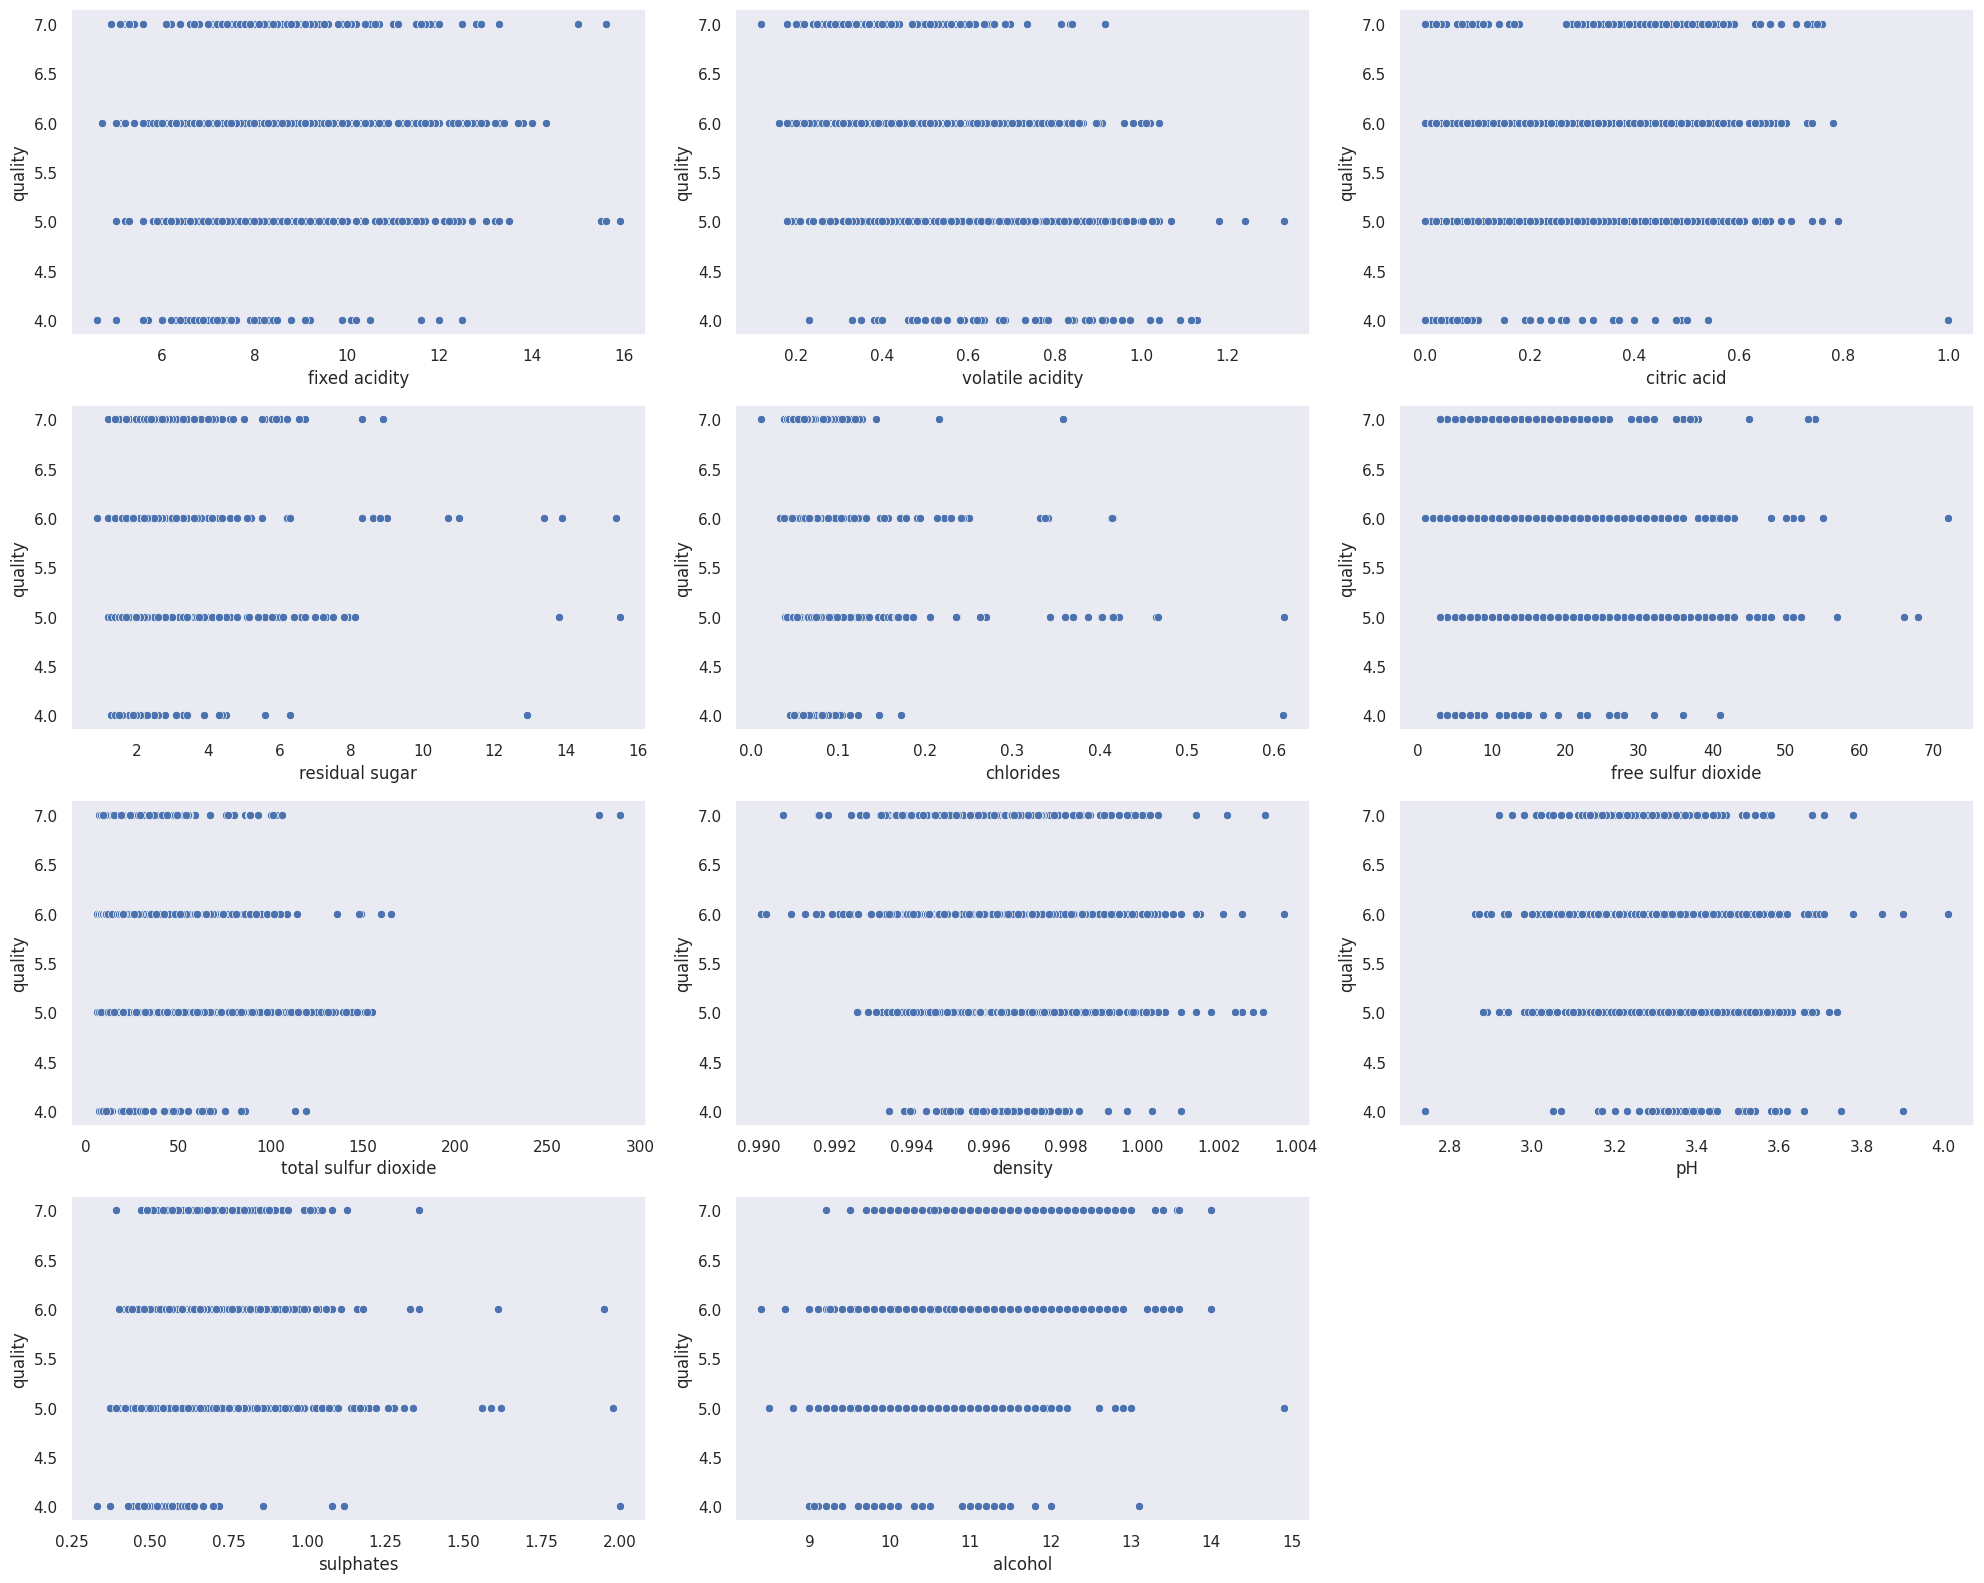

In [38]:
plt.figure(figsize=(20,16))
List=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
"total sulfur dioxide",
"density",
"pH",
"sulphates",
"alcohol",
]
j=0;
for i in List:
  j=j+1
  plt.subplot(4, 3, j)
  sns.scatterplot(x=i, y="quality", data=data)

plt.tight_layout()
plt.show()

##Pie Chart

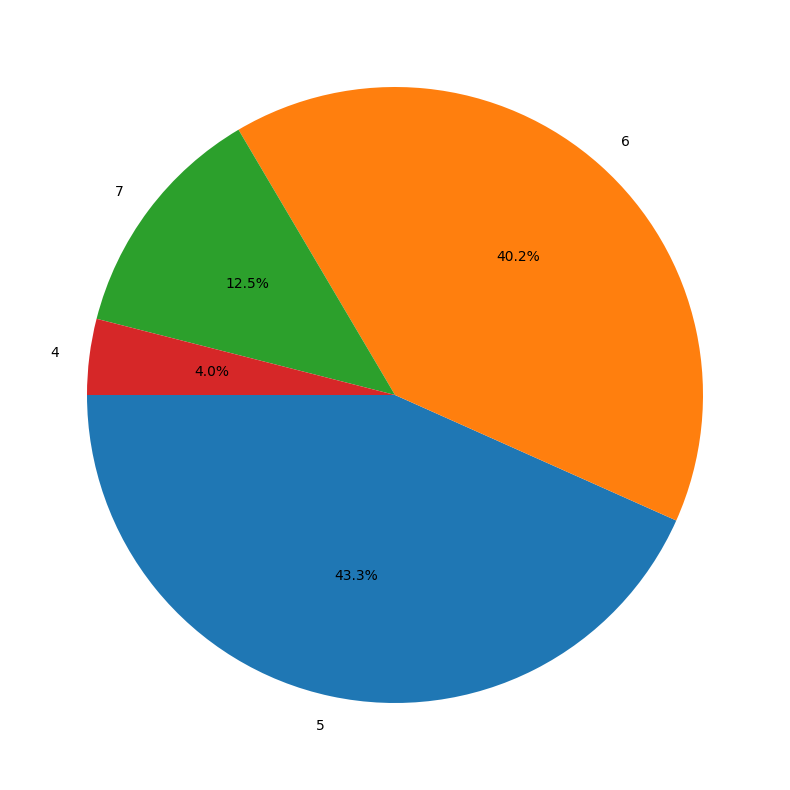

In [22]:
data["quality"].value_counts().plot(kind="pie",
                                       autopct='%1.1f%%',
                                       startangle=180)
plt.ylabel("")
plt.show()

##HeatMap

In [23]:
correlation_matrix = data.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254384,0.663438,0.108343,0.085194,-0.140544,-0.101322,0.670446,-0.685602,0.193439,-0.054515,0.130699
volatile acidity,-0.254384,1.000000,-0.548969,-0.006197,0.047723,-0.011022,0.081793,0.025859,0.234576,-0.246979,-0.204297,-0.375562
citric acid,0.663438,-0.548969,1.000000,0.144952,0.217841,-0.046213,0.051770,0.357761,-0.544506,0.324559,0.107435,0.218953
residual sugar,0.108343,-0.006197,0.144952,1.000000,0.029864,0.171445,0.209813,0.323542,-0.085369,-0.010515,0.059854,0.015759
chlorides,0.085194,0.047723,0.217841,0.029864,1.000000,0.001014,0.049530,0.193453,-0.276099,0.407839,-0.218907,-0.111609
free sulfur dioxide,-0.140544,-0.011022,-0.046213,0.171445,0.001014,1.000000,0.666327,-0.011546,0.057721,0.054777,-0.084460,-0.060272
total sulfur dioxide,-0.101322,0.081793,0.051770,0.209813,0.049530,0.666327,1.000000,0.084028,-0.082761,0.035749,-0.223169,-0.199786
density,0.670446,0.025859,0.357761,0.323542,0.193453,-0.011546,0.084028,1.000000,-0.355692,0.156113,-0.497149,-0.161429
pH,-0.685602,0.234576,-0.544506,-0.085369,-0.276099,0.057721,-0.082761,-0.355692,1.000000,-0.214634,0.212390,-0.037646
sulphates,0.193439,-0.246979,0.324559,-0.010515,0.407839,0.054777,0.035749,0.156113,-0.214634,1.000000,0.083242,0.235981


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


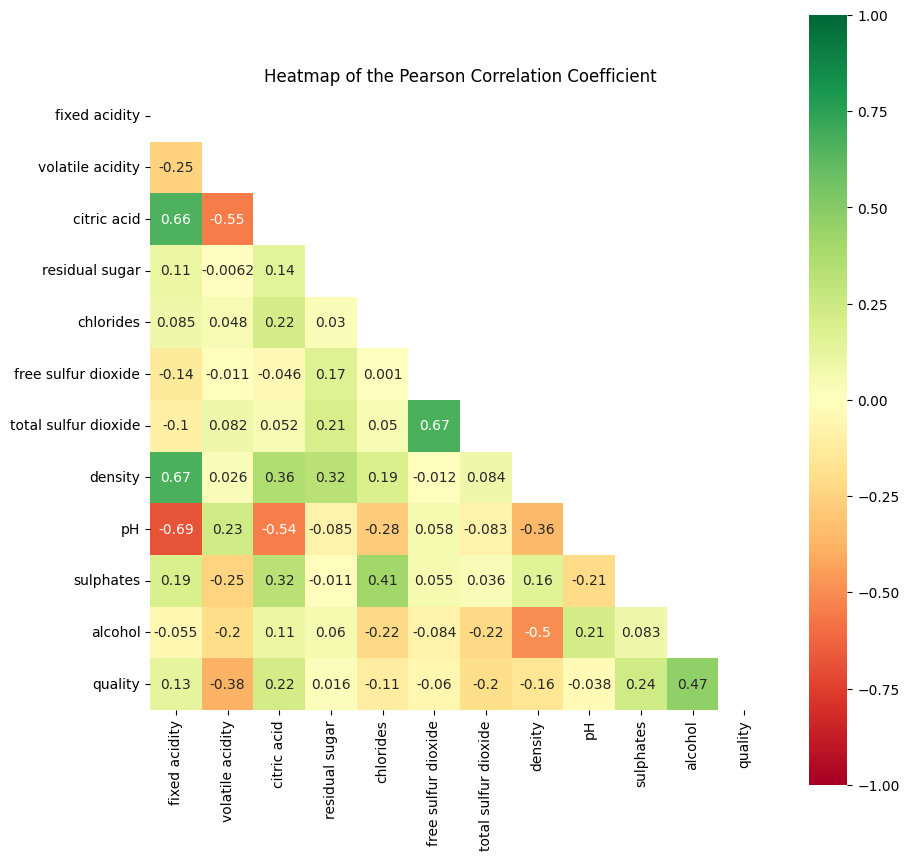

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

##Line Plot

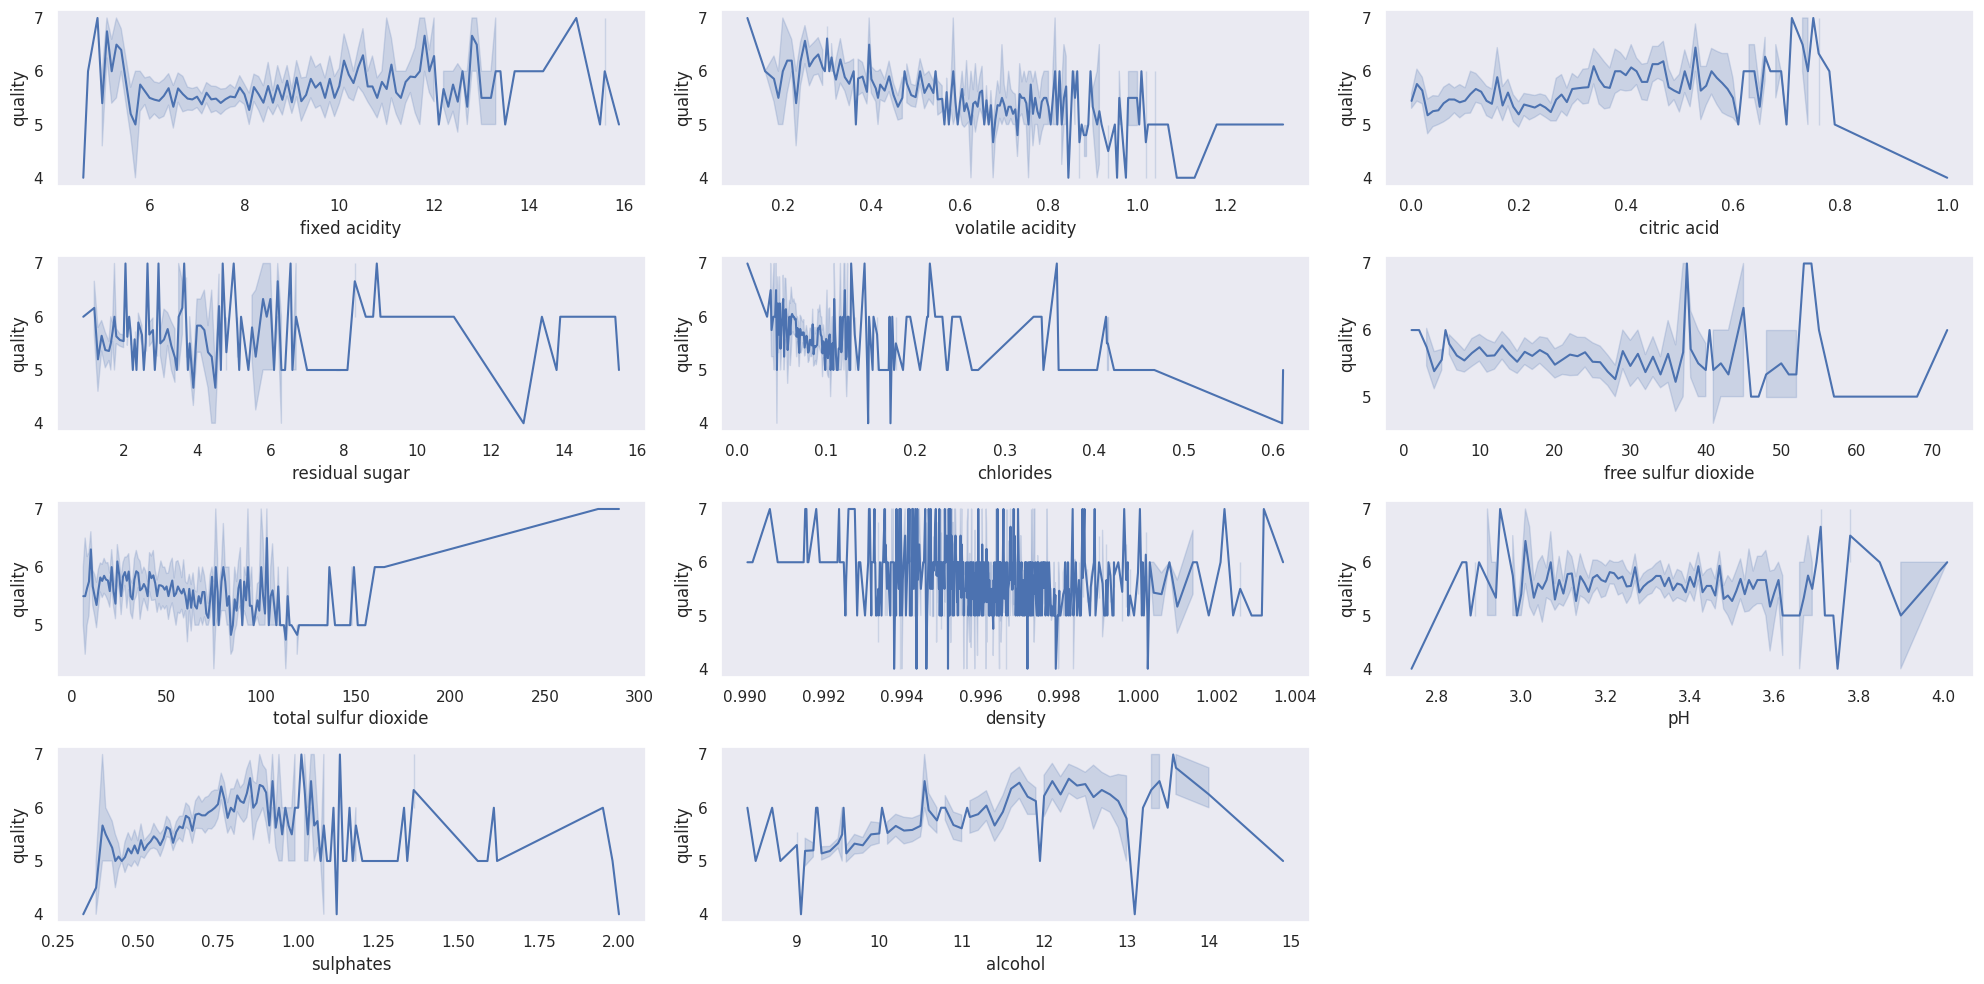

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

In [40]:

List=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
"total sulfur dioxide",
"density",
"pH",
"sulphates",
"alcohol",
]
j=0;
for i in List:
  j=j+1
  plt.subplot(4, 3, j)
  sns.lineplot(x=i, y="quality", data=data)

plt.tight_layout()
plt.show()
plt.figure(figsize=(20,16))